In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

%matplotlib inline

In [2]:
class LogisticNeuron:
    
    def __init__(self, n_iter, eta, random_state=None):
        """
        n_iter: int. 
                Number of epochs to apply gradient descent
                
        eta: float
                Learning rate of gradient descent
                
        random_state: int
                To reproduce result 
        """
        self.n_iter = n_iter
        self.eta = eta
        self.random_state = random_state
        
        self.fitted = False
        
    def __forward_propagation(self):
        net_input = self.__net_input()
        self.Z = self._sigmoid(net_input)
        return self._compute_cost()
    
    def __backward_propagation(self):
        return self.Z - self.y
    
    def fit(self, X, y):
        """
        X: array-like. shape = [n_features, n_samples]
           X stores the samples column wise
        
        y: array-like. shape = [n_samples]
           y stores the labels of the different samples
           
        return: self
        """
        self.X = X.T
        self.y = y
        self.fitted = True
        
        self.__random_initialization()
        self.costs_ = []
        
        for _ in range(self.n_iter):
            cost = self.__forward_propagation()
            self.costs_.append(cost)
            
            self.__backward_propagation()
            self.__update_weights()
            
        return self
    
    def predict(self, X):
        X = X.T
        net_input = self.net_input(X)
        sigmoid = self._sigmoid(net_input)
        return np.where(sigmoid >= 0.5, 1, 0).squeeze()
        
    def net_input(self, x):
        return np.dot(self.w_.T, x) + self.b_
    
    def __random_initialization(self):
        self.w_ = np.random.rand(self.X.shape[0], 1)
        self.b_ = np.random.rand()
        
    def _compute_cost(self):
        m = len(self.w_)
        J = - 1 / m * np.sum((self.y * np.log(self.Z) + (1.0 - self.y) * np.log(1.0 - self.Z)))
        return J
        
    def _sigmoid(self, x):
        return 1.0 / (1.0 + np.exp(-x))
    
    def __net_input(self):
        return np.dot(self.w_.T, self.X) + self.b_
    
    def __update_weights(self):
        m = len(self.w_)
        dZ = self.__backward_propagation()
        self.w_ -= 1 / m * self.eta * np.dot(self.X, dZ.T)
        self.b_ -=  1 / m * self.eta * np.sum(dZ)
        
    def __repr__(self):
        if not self.fitted:
            return "LogisticNeuron()"
        return f"LogisticNeuron(eta = {self.eta}, epochs = {self.n_iter})"

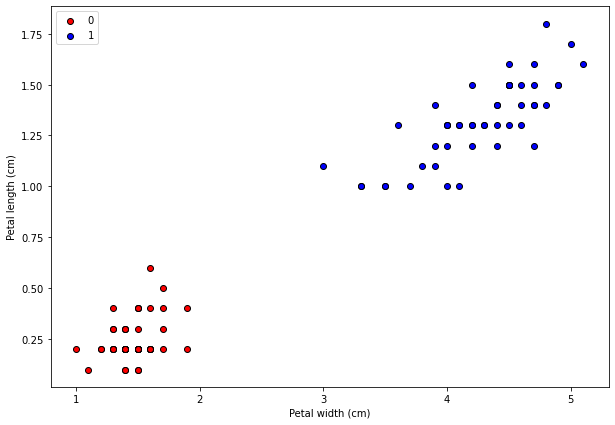

In [3]:
iris = load_iris()
X = iris.data[:100, (2, 3)]
y = iris.target[:100]

plt.figure(figsize=(10, 7))

colors = ['red', 'blue']
for label, color in zip(np.unique(y), colors):
    plt.scatter(X[y == label, 0], X[y == label, 1], c=color, 
                edgecolor='black', label=label)
    
plt.xlabel('Petal width (cm)')
plt.ylabel('Petal length (cm)')
plt.legend()
plt.show()

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, random_state=1)

print('Train size: ', len(X_train))
print('Test size: ', len(X_test))

print('Distribution of y_train: ', np.bincount(y_train))
print('Distribution of y_test: ', np.bincount(y_test))

Train size:  70
Test size:  30
Distribution of y_train:  [36 34]
Distribution of y_test:  [14 16]


In [5]:
neuron = LogisticNeuron(n_iter=100, eta=0.01, random_state=0)
neuron

LogisticNeuron()

In [6]:
neuron.fit(X_train, y_train)

LogisticNeuron(eta = 0.01, epochs = 100)

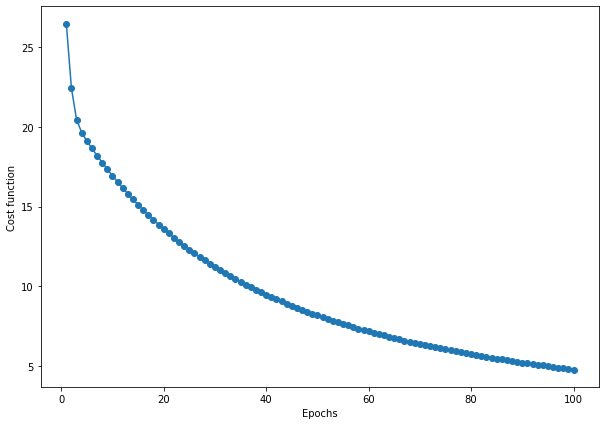

In [7]:
costs = neuron.costs_

plt.figure(figsize=(10, 7))
plt.plot(range(1, len(costs) + 1), costs, 'o-')

plt.xlabel('Epochs')
plt.ylabel('Cost function')
plt.show()

In [8]:
from sklearn.metrics import accuracy_score

y_test_pred = neuron.predict(X_test)
print('Test accuracy: ', accuracy_score(y_test_pred, y_test))

Test accuracy:  1.0


In [9]:
def plot_decision_region(X, y, classifier, test_indx=range(100, 150), 
                         margin=1, resolution=0.02):
    
    from matplotlib.colors import ListedColormap
    colors = ['blue', 'red']
    cmap = ListedColormap(colors)
    
    x1_min, x1_max = X[:, 0].min() - margin, X[:, 0].max() + margin
    x2_min, x2_max = X[:, 1].min() - margin, X[:, 1].max() + margin
    
    X1, X2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), 
                         np.arange(x2_min, x2_max, resolution))
    
    Z = classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape)
    
    plt.figure(figsize=(10, 7))
    plt.contourf(X1, X2, Z, cmap=cmap, alpha=0.3)
    
    for label, color in zip(np.unique(y), colors):
        plt.scatter(X[y == label, 0], X[y == label, 1], c=color, 
                    label=label, edgecolor='black')
        
    if test_indx:
        X = X[test_indx]
        y = y[test_indx]
        for label, color in zip(np.unique(y), colors):
            plt.scatter(X[y == label, 0], X[y == label, 1], 
                        c=[], s=200, edgecolor=color, ls='--', 
                        label=f'test {label}')
            
            
    plt.legend()
    plt.show()

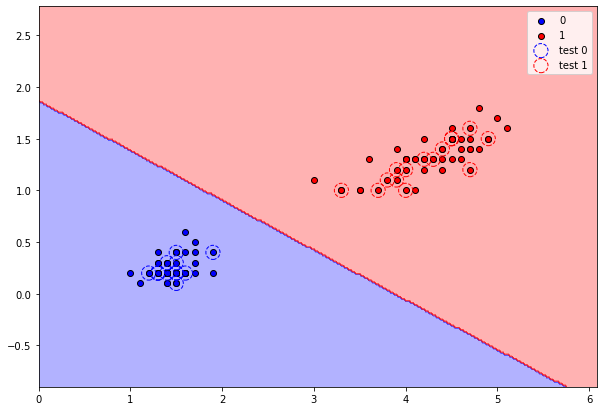

In [10]:
X_stacked = np.vstack((X_train, X_test))
y_stacked = np.hstack((y_train, y_test))

plot_decision_region(X_stacked, y_stacked, neuron, test_indx=range(70, 100))